### Importing Libraries

In [1]:
import tensorflow as tf #used for building and training neural networks which contains layers used to process the image
import cv2 # opencv is used to read the image
import os # os module is used to interact with OS. Used for handling files or directories
from tensorflow.keras.preprocessing.image import ImageDataGenerator # it is used to generate batches of image data, applying varous transformation like rotation, zooming, and transition.
from tensorflow.keras.preprocessing import image # it is used to process the individual image
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input,decode_predictions # it is used to preprocess i/p images before passing them to vgg19 model.

In [2]:
# length of brownspot images in training dataset
len(os.listdir("C:/Users/SATYADEVI/Desktop/MiniProject/project/Dataset/train/Brownspot"))

342

In [3]:
# length of brownspot images in testing dataset
len(os.listdir("C:/Users/SATYADEVI/Desktop/MiniProject/project/Dataset/test/Brownspot"))

120

In [4]:
# length of brownspot images in validation dataset
len(os.listdir("C:/Users/SATYADEVI/Desktop/MiniProject/project/Dataset/validate/Brownspot"))

132

### Image Acquization

In [5]:
# load the image
img=image.load_img("C:/Users/SATYADEVI/Desktop/MiniProject/project/Dataset/train/Brownspot/IMG_3081.jpg")

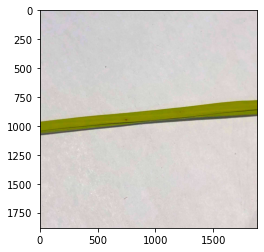

In [6]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [7]:
#convert image to array
cv2.imread("C:/Users/SATYADEVI/Desktop/MiniProject/project/Dataset/train/BrownSpot/IMG_3081.jpg")

array([[[211, 200, 202],
        [211, 200, 202],
        [211, 200, 202],
        ...,
        [212, 209, 218],
        [212, 209, 218],
        [212, 209, 218]],

       [[211, 200, 202],
        [211, 200, 202],
        [211, 200, 202],
        ...,
        [212, 209, 218],
        [212, 209, 218],
        [212, 209, 218]],

       [[212, 201, 203],
        [211, 200, 202],
        [211, 200, 202],
        ...,
        [212, 209, 218],
        [212, 209, 218],
        [212, 209, 218]],

       ...,

       [[208, 210, 218],
        [209, 211, 219],
        [209, 211, 219],
        ...,
        [197, 199, 207],
        [197, 199, 207],
        [197, 199, 207]],

       [[210, 212, 220],
        [208, 210, 218],
        [208, 210, 218],
        ...,
        [200, 202, 210],
        [200, 202, 210],
        [200, 202, 210]],

       [[209, 211, 219],
        [208, 210, 218],
        [208, 210, 218],
        ...,
        [200, 202, 210],
        [200, 202, 210],
        [200, 202, 210]]

In [8]:
#shape of the array of the image
cv2.imread("C:/Users/SATYADEVI/Desktop/MiniProject/project/Dataset/train/BrownSpot/IMG_3081.jpg").shape

(1881, 1881, 3)

### split the the dataset into train,validate and test

In [9]:
train=ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,preprocessing_function=preprocess_input )
validation=ImageDataGenerator(preprocessing_function=preprocess_input)

In [10]:
train_dataset=train.flow_from_directory("C:/Users/SATYADEVI/Desktop/MiniProject/project/Dataset/train",
                                       target_size=(256,256),
                                       batch_size=32)
validate_dataset=validation.flow_from_directory("C:/Users/SATYADEVI/Desktop/MiniProject/project/Dataset/validate",
                                       target_size=(256,256),
                                       batch_size=32)

Found 1283 images belonging to 2 classes.
Found 398 images belonging to 2 classes.


### Preprocessing the Image

In [11]:
t_img ,label=train_dataset[1]

In [12]:
def plotImage(img_arr,label):
    for im, l in zip(img_arr,label):
        plt.figure(figsize=(5,5))
        plt.imshow(im)
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


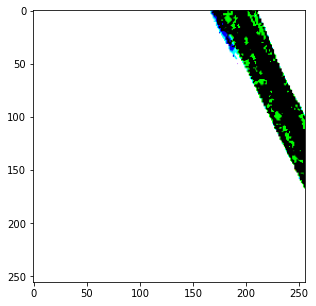

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


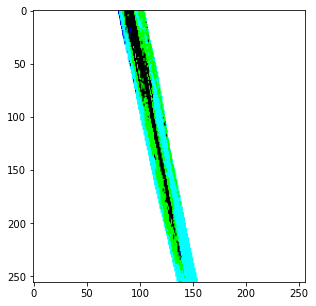

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


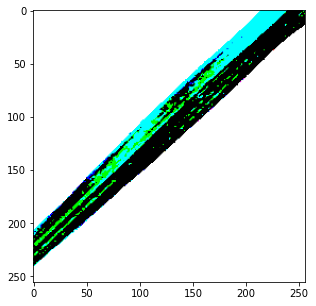

In [13]:
plotImage(t_img[6:9],label[6:9])

### Dataset classes

In [14]:
train_dataset.class_indices

{'Brownspot': 0, 'Healthy': 1}

In [15]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

### Model Building

In [16]:
#Building our model
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19

In [17]:
base_model=VGG19(input_shape=(256,256,3),include_top=False)

In [18]:
for layer in base_model.layers:
    layer.trainable=False

In [19]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

### save the best model

In [20]:
X=Flatten()(base_model.output)
X=Dense(units=2,activation='softmax')(X)

#Creating our model
model=Model(base_model.input,X)


In [21]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [22]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])# Compile the model

- EarlyStopping callback stops the training process if the monitored metric (validation accuracy) does not improve by a certain threshold (min_delta) for a specific number of epochs (patience). On the other hand, the ModelCheckpoint callback saves the best model based on the monitored metric, allowing you to retrieve the best-performing model at the end of training. These callbacks help in preventing overfitting and saving the model with the best generalization capabilities.

In [23]:
#Early stopping and Model Check Point
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1)
mc=ModelCheckpoint(filepath="best_model.h5",
                  monitor='val_accuracy',
                   min_delta=0.01,
                   patience=3,
                   verbose=1,
                  save_best_only=True)
cb=[es,mc]

In [24]:
his=model.fit_generator(train_dataset,
                        steps_per_epoch=16,
                        epochs=50,  
                        verbose=1, 
                        callbacks=cb,
                        validation_data=validate_dataset,
                        validation_steps=5)

<ipython-input-24-b46ea8dfccc9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his=model.fit_generator(train_dataset,


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 3.4847 - accuracy: 0.7266  
Epoch 1: val_accuracy improved from -inf to 0.82500, saving model to best_model.h5
16/16 [==============================] - 2073s 119s/step - loss: 3.4847 - accuracy: 0.7266 - val_loss: 1.6724 - val_accuracy: 0.8250
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 2.5836 - accuracy: 0.8137 
Epoch 2: val_accuracy improved from 0.82500 to 0.88125, saving model to best_model.h5
16/16 [==============================] - 2611s 170s/step - loss: 2.5836 - accuracy: 0.8137 - val_loss: 1.6046 - val_accuracy: 0.8813
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 2.1941 - accuracy: 0.8555 
Epoch 3: val_accuracy improved from 0.88125 to 0.90000, saving model to best_model.h5
16/16 [==============================] - 1120s 71s/step - loss: 2.1941 - accuracy: 0.8555 - val_loss: 1.1650 - val_accuracy: 0.9000
Epoch 4/50
16/16 [==============================] - ETA: 0s -

### plot values of accuracy and loss

In [25]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

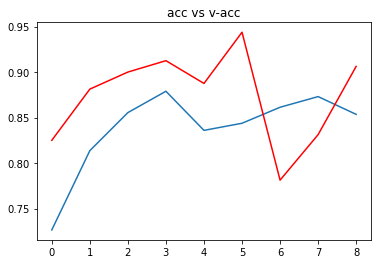

In [26]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")
plt.title("acc vs v-acc")
plt.show()

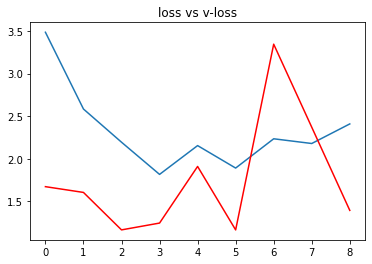

In [27]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")
plt.title("loss vs v-loss")
plt.show()

### Accuracy

In [5]:
# load best model
from keras.models import load_model
model=load_model("C:/Users/SATYADEVI/Desktop/MIniProject/project/Deployment/best_model.h5");

In [6]:
acc=model.evaluate_generator(validate_dataset)[1]
print(f"The accuracy of your model is {acc*100} %") 

<ipython-input-6-21633b84cad1>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc=model.evaluate_generator(validate_dataset)[1]


The accuracy of your model is 90.9547746181488 %


### prediction

In [6]:
ref=dict(zip(list(train_dataset.class_indices.values()),list(train_dataset.class_indices.keys())))

In [8]:
import numpy as np
def prediction(path):
    img=image.load_img(path, target_size=(256,256))
    i=image.img_to_array(img)
    im=preprocess_input(i)
    img=np.expand_dims(im,axis=0)
    pred=np.argmax(model.predict(img))
    print(f"The image belongs to {ref[pred]}")

In [12]:
path="C:/Users/SATYADEVI/Desktop/IMG_5495.jpg"
prediction(path)

1/1 [==============================] - 2s 2s/step
The image belongs to Brownspot


In [11]:
path="C:/Users/SATYADEVI/Desktop/IMG_2990.jpg"
prediction(path)

1/1 [==============================] - 2s 2s/step
The image belongs to Brownspot
